In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import scipy as sp
plt.style.use('seaborn')

In [0]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')
submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sample_submission.csv')
submission["type"] = "Unknown"

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199991 entries, 0 to 199990
Data columns (total 23 columns):
id            199991 non-null int64
type          199991 non-null object
fiberID       199991 non-null int64
psfMag_u      199991 non-null float64
psfMag_g      199991 non-null float64
psfMag_r      199991 non-null float64
psfMag_i      199991 non-null float64
psfMag_z      199991 non-null float64
fiberMag_u    199991 non-null float64
fiberMag_g    199991 non-null float64
fiberMag_r    199991 non-null float64
fiberMag_i    199991 non-null float64
fiberMag_z    199991 non-null float64
petroMag_u    199991 non-null float64
petroMag_g    199991 non-null float64
petroMag_r    199991 non-null float64
petroMag_i    199991 non-null float64
petroMag_z    199991 non-null float64
modelMag_u    199991 non-null float64
modelMag_g    199991 non-null float64
modelMag_r    199991 non-null float64
modelMag_i    199991 non-null float64
modelMag_z    199991 non-null float64
dtypes: float64(20),

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 22 columns):
id            10009 non-null int64
fiberID       10009 non-null int64
psfMag_u      10009 non-null float64
psfMag_g      10009 non-null float64
psfMag_r      10009 non-null float64
psfMag_i      10009 non-null float64
psfMag_z      10009 non-null float64
fiberMag_u    10009 non-null float64
fiberMag_g    10009 non-null float64
fiberMag_r    10009 non-null float64
fiberMag_i    10009 non-null float64
fiberMag_z    10009 non-null float64
petroMag_u    10009 non-null float64
petroMag_g    10009 non-null float64
petroMag_r    10009 non-null float64
petroMag_i    10009 non-null float64
petroMag_z    10009 non-null float64
modelMag_u    10009 non-null float64
modelMag_g    10009 non-null float64
modelMag_r    10009 non-null float64
modelMag_i    10009 non-null float64
modelMag_z    10009 non-null float64
dtypes: float64(20), int64(2)
memory usage: 1.7 MB


In [0]:
train.describe()

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199991.00000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,99995.00000,360.830152,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,18.000882,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281
std,57732.57318,225.305890,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,145.862346,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138
min,0.00000,1.000000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,-26505.602101,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196
25%,49997.50000,174.000000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,17.606148,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,99995.00000,349.000000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,18.710967,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,149992.50000,526.000000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,20.133179,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,199990.00000,1000.000000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,18358.921741,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172


In [0]:
train.type.value_counts()

QSO                    49680
GALAXY                 37347
SERENDIPITY_BLUE       21760
SPECTROPHOTO_STD       14630
REDDEN_STD             14618
STAR_RED_DWARF         13750
STAR_BHB               13500
SERENDIPITY_FIRST       7132
ROSAT_D                 6580
STAR_CATY_VAR           6506
SERENDIPITY_DISTANT     4654
STAR_CARBON             3257
SERENDIPITY_RED         2562
STAR_WHITE_DWARF        2160
STAR_SUB_DWARF          1154
STAR_BROWN_DWARF         500
SKY                      127
SERENDIPITY_MANUAL        61
STAR_PN                   13
Name: type, dtype: int64

In [0]:
train.head()

,id,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [0]:
train_fiber=train['fiberID']
train=train.drop(columns=['fiberID'])

In [0]:
train.head()

,id,type,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,0,QSO,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,1,QSO,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,2,QSO,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,3,QSO,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,4,STAR_RED_DWARF,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [0]:
train_y=train['type']
train_x=train.drop(columns=['type'])

In [0]:
train_x.head()

,id,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,0,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,1,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,2,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,3,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,4,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [0]:
train_y

0                    QSO
1                    QSO
2                    QSO
3                    QSO
4         STAR_RED_DWARF
               ...      
199986               QSO
199987            GALAXY
199988    STAR_RED_DWARF
199989            GALAXY
199990               QSO
Name: type, Length: 199991, dtype: object

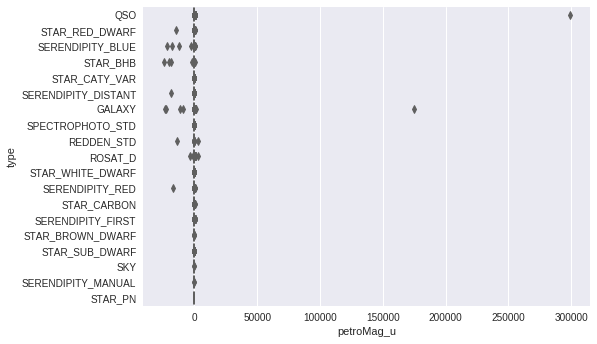

In [5]:
sns.boxplot(y="type", x="petroMag_u", data=train,palette="Set3")
plt.show()

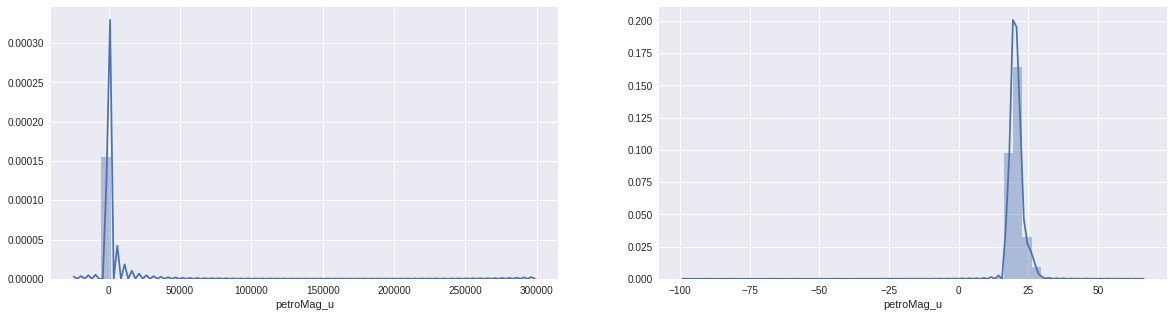

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(train['petroMag_u'])
plt.subplot(1,2,2)
sns.distplot(test['petroMag_u'])

In [6]:
train[train['petroMag_u'] > 150000]['petroMag_u']

88832     175257.982891
139197    298771.019041
Name: petroMag_u, dtype: float64

In [0]:
train.drop(train[train['petroMag_u'] >150000]['petroMag_u'].index,axis=0,inplace=True)

In [8]:
train.isnull().sum()

id            0
type          0
psfMag_u      0
psfMag_g      0
psfMag_r      0
psfMag_i      0
psfMag_z      0
fiberMag_u    0
fiberMag_g    0
fiberMag_r    0
fiberMag_i    0
fiberMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
dtype: int64

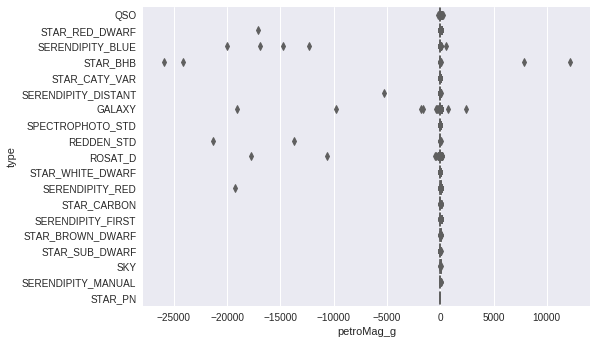

In [0]:
sns.boxplot(y="type", x="petroMag_g", data=train,palette="Set3")
plt.show()

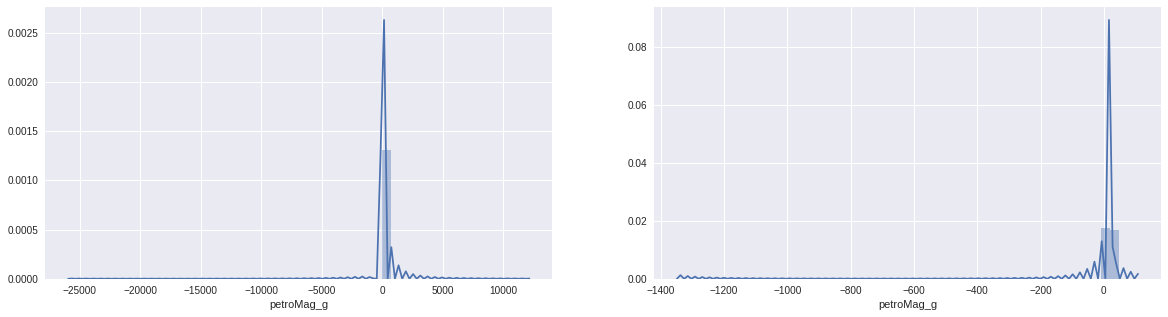

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(train['petroMag_g'])
plt.subplot(1,2,2)
sns.distplot(test['petroMag_g'])

In [9]:
train[train['petroMag_g'] < -5000]['petroMag_g']

3991     -19228.003222
18277    -25958.752324
26683    -16928.616668
37735    -19060.074306
46441    -17790.951802
67227    -12287.093670
76167    -24123.028498
80038    -13701.706977
85676    -21309.518041
101377    -9779.269680
102448   -20009.797626
117917    -5245.919801
143592   -10642.019359
154235   -14794.043608
177300   -17120.984968
Name: petroMag_g, dtype: float64

In [10]:
train[train['petroMag_g'] > 5000]['petroMag_g']

74089     12139.815877
111582     7889.397245
Name: petroMag_g, dtype: float64

In [0]:
train.drop(train[train['petroMag_g']<-5000]['petroMag_g'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['petroMag_g'] >5000]['petroMag_g'].index,axis=0,inplace=True)

In [13]:
train.isnull().sum()

id            0
type          0
psfMag_u      0
psfMag_g      0
psfMag_r      0
psfMag_i      0
psfMag_z      0
fiberMag_u    0
fiberMag_g    0
fiberMag_r    0
fiberMag_i    0
fiberMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
dtype: int64

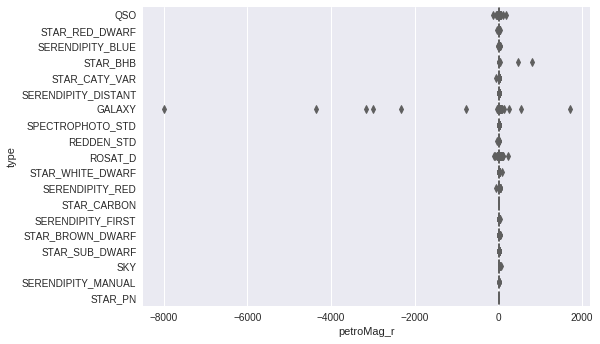

In [0]:
sns.boxplot(y="type", x="petroMag_r", data=train,palette="Set3")
plt.show()

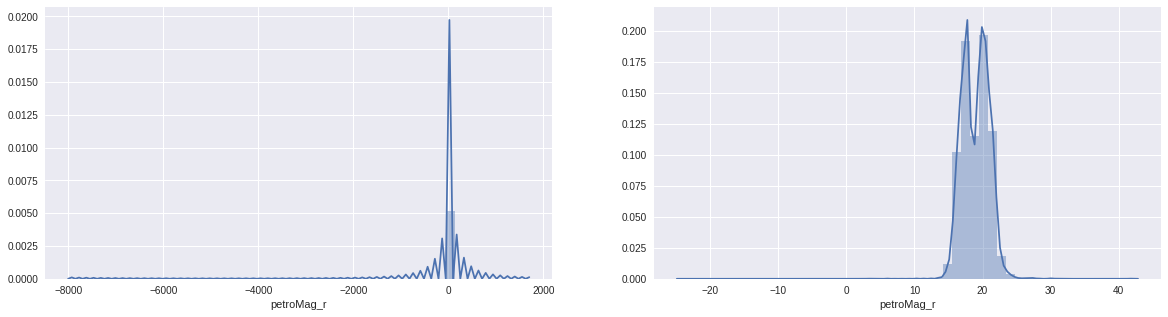

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(train['petroMag_r'])
plt.subplot(1,2,2)
sns.distplot(test['petroMag_r'])

In [14]:
train[train['petroMag_r'] < -2000]['petroMag_r']

33895    -4370.038636
46896    -2337.614557
73152    -3162.527130
147012   -2998.277036
187706   -8002.627012
Name: petroMag_r, dtype: float64

In [0]:
train.drop(train[train['petroMag_r'] < -2000]['petroMag_r'].index,axis=0,inplace=True)

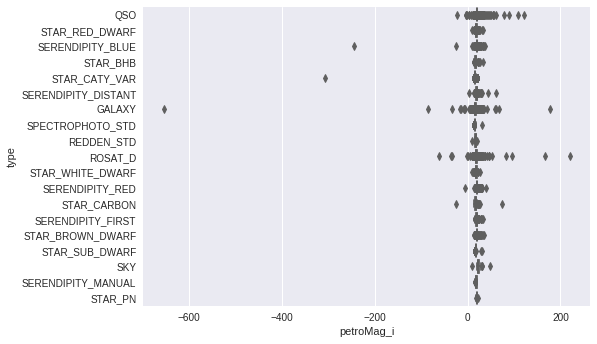

In [0]:
sns.boxplot(y="type", x="petroMag_i", data=train,palette="Set3")
plt.show()

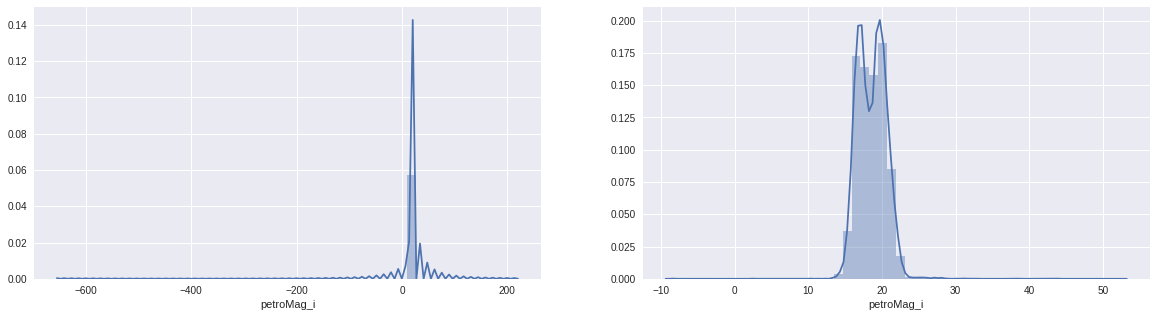

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(train['petroMag_i'])
plt.subplot(1,2,2)
sns.distplot(test['petroMag_i'])

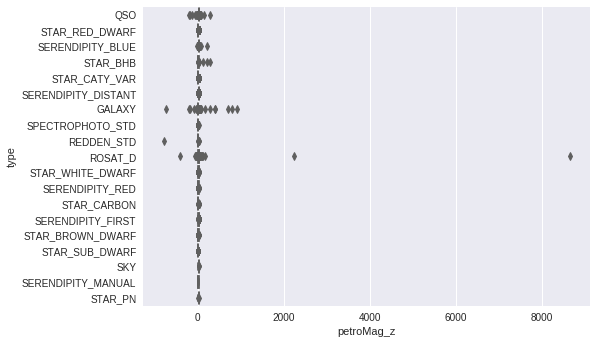

In [0]:
sns.boxplot(y="type", x="petroMag_z", data=train,palette="Set3")
plt.show()

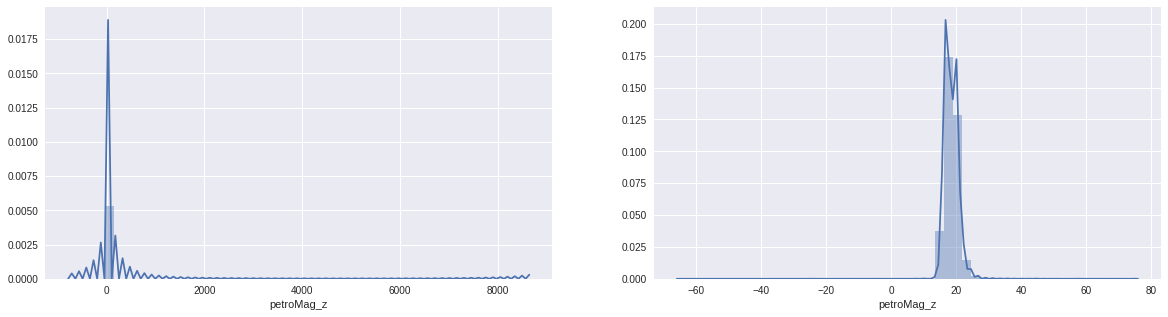

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(train['petroMag_z'])
plt.subplot(1,2,2)
sns.distplot(test['petroMag_z'])

In [0]:
train.drop(train[train['petroMag_z'] > 8000]['petroMag_z'].index,axis=0,inplace=True)

In [17]:
train.isnull().sum()

id            0
type          0
psfMag_u      0
psfMag_g      0
psfMag_r      0
psfMag_i      0
psfMag_z      0
fiberMag_u    0
fiberMag_g    0
fiberMag_r    0
fiberMag_i    0
fiberMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
dtype: int64

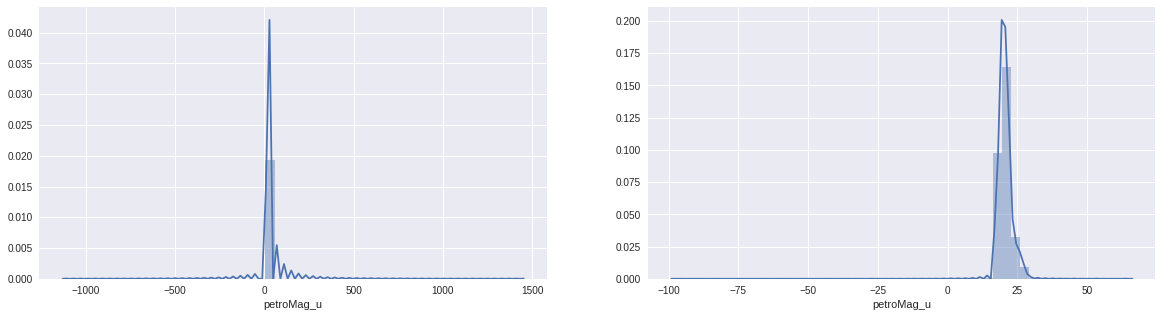

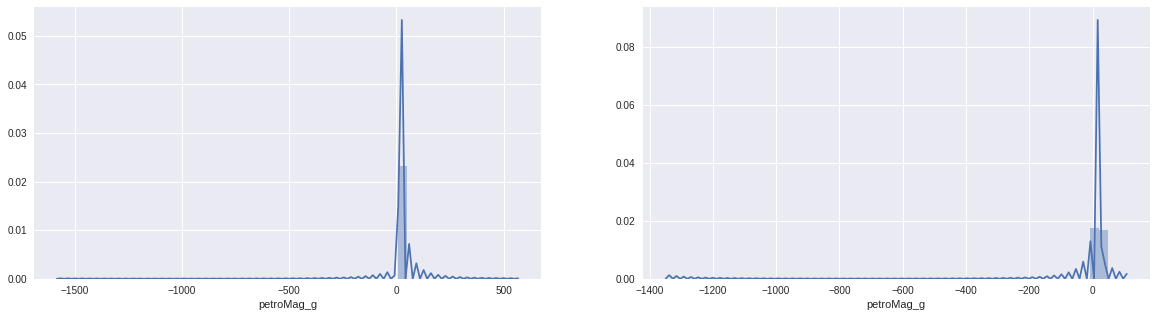

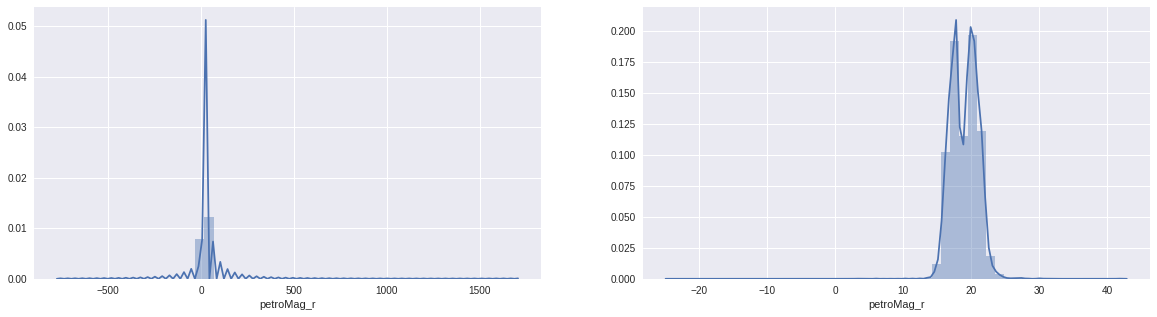

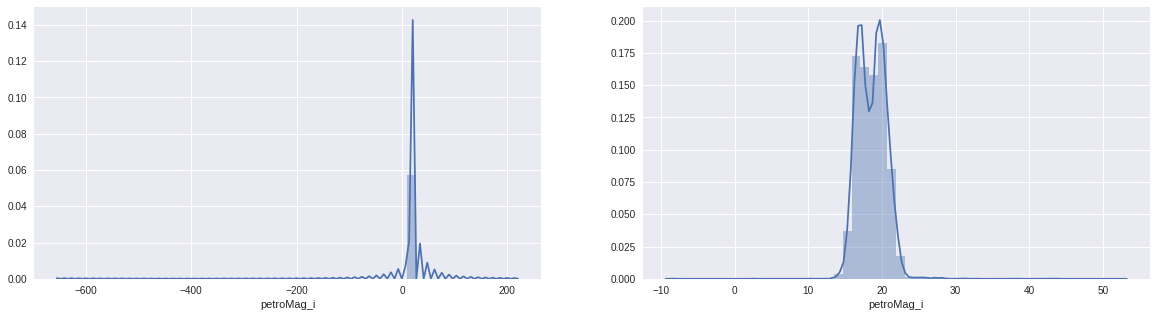

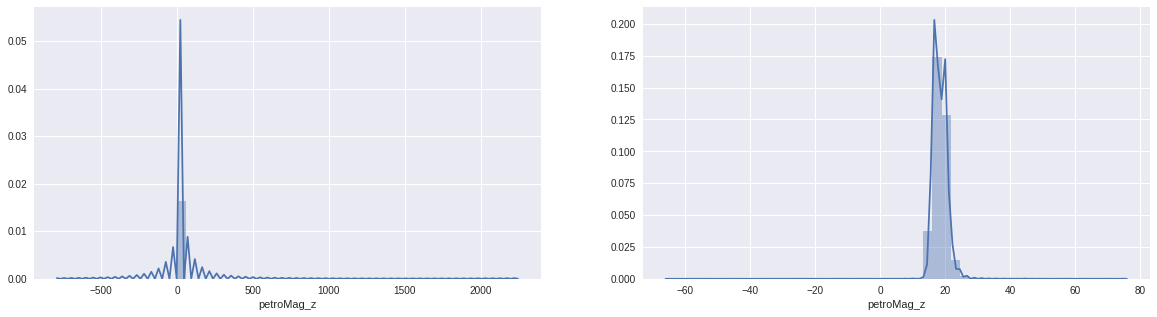

In [0]:
for s in ['u','g','r','i','z']:
  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  sns.distplot(train['petroMag_%s'%(s)])
  plt.subplot(1,2,2)
  sns.distplot(test['petroMag_%s'%(s)])

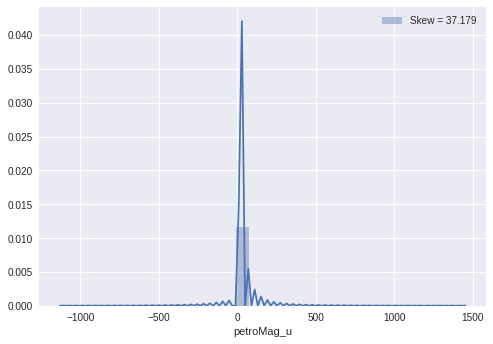

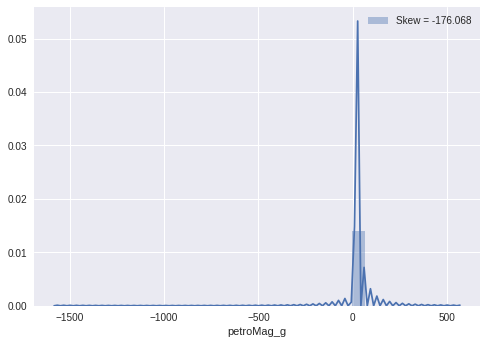

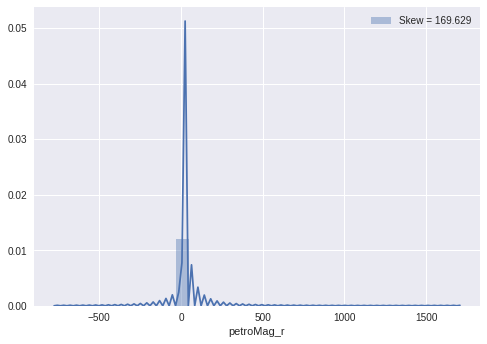

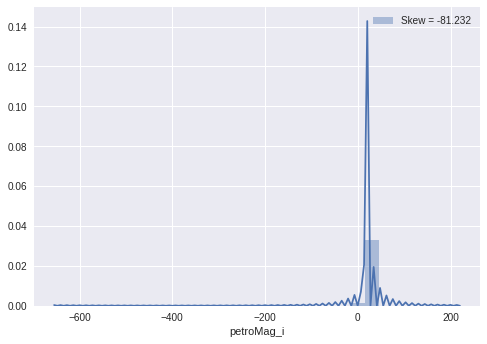

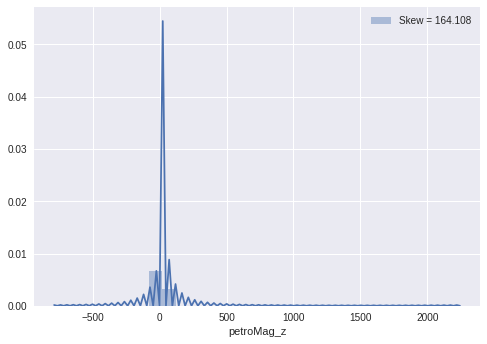

In [0]:
for feat in ['petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z']:
    skew = train[feat].skew()
    sns.distplot(train[feat], kde= True, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()


In [18]:
train[['petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z']].describe()

,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
count,199966.000000,199966.000000,199966.000000,199966.000000,199966.000000
mean,20.717640,19.589085,19.024828,18.603515,18.415157
std,6.073849,4.942529,5.301256,2.755543,7.072482
min,-1131.081339,-1581.627834,-776.113687,-654.195115,-789.601838
25%,19.248132,18.114156,17.480169,17.050705,16.805079
50%,20.366961,19.586777,19.183060,18.693668,18.174813
75%,21.797517,21.004399,20.457536,20.019136,19.807642
max,1452.080803,566.468016,1705.906184,219.701423,2244.116502


In [19]:
test[['petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z']].describe()

,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,20.715429,19.462021,18.995001,18.616519,18.411996
std,2.807434,13.971203,1.979225,1.970463,2.373022
min,-98.181975,-1348.068776,-23.908952,-8.356654,-64.917293
25%,19.249432,18.104265,17.475078,17.043615,16.805557
50%,20.371014,19.582955,19.197068,18.684269,18.171966
75%,21.803705,21.025719,20.428279,20.015701,19.815916
max,65.392087,106.962571,41.850633,52.221528,74.747394


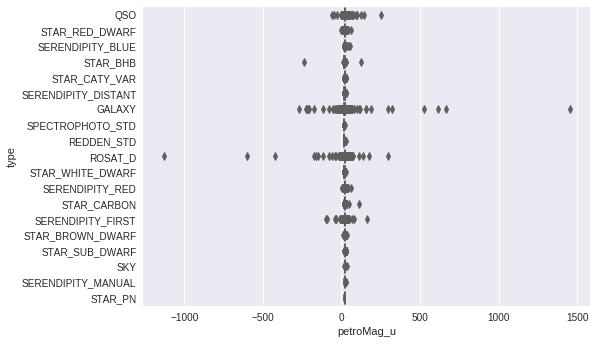

In [20]:
sns.boxplot(y="type", x="petroMag_u", data=train,palette="Set3")
plt.show()

In [21]:
train[train['petroMag_u'] < -400]['petroMag_u']

93847    -1131.081339
136372    -422.715728
142760    -602.308328
Name: petroMag_u, dtype: float64

In [0]:
train.drop(train[train['petroMag_u'] < -400]['petroMag_u'].index,axis=0,inplace=True)

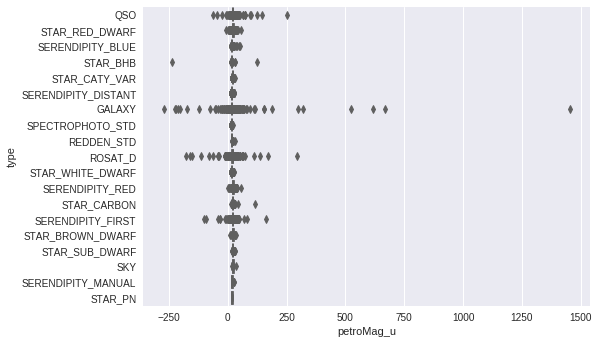

In [0]:
sns.boxplot(y="type", x="petroMag_u", data=train,palette="Set3")
plt.show()

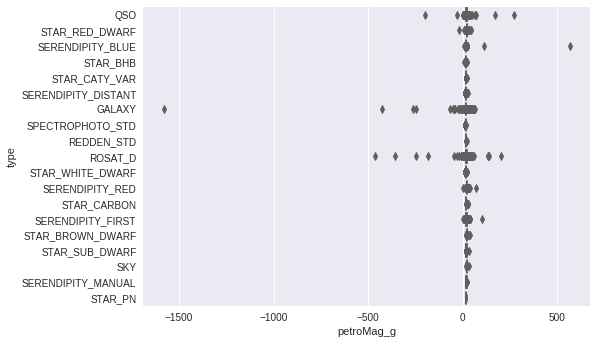

In [0]:
sns.boxplot(y="type", x="petroMag_g", data=train,palette="Set3")
plt.show()

In [23]:
train[train['petroMag_g'] < -1500]['petroMag_g']

20680   -1581.627834
Name: petroMag_g, dtype: float64

In [0]:
train.drop(train[train['petroMag_g'] < -1500]['petroMag_g'].index,axis=0,inplace=True)

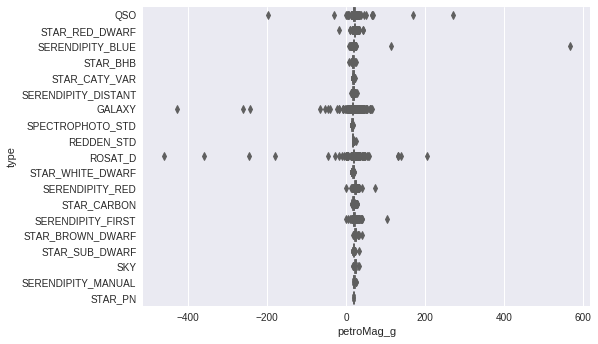

In [25]:
sns.boxplot(y="type", x="petroMag_g", data=train,palette="Set3")
plt.show()

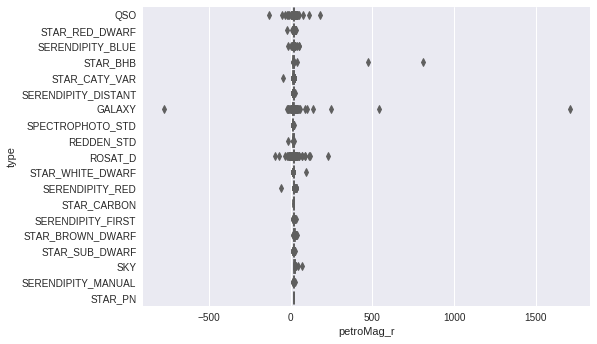

In [26]:
sns.boxplot(y="type", x="petroMag_r", data=train,palette="Set3")
plt.show()

In [27]:
train[train['petroMag_r'] < -500]['petroMag_r']

120418   -776.113687
Name: petroMag_r, dtype: float64

In [0]:
train.drop(train[train['petroMag_r'] < -500]['petroMag_r'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['petroMag_r'] > 1500]['petroMag_r'].index,axis=0,inplace=True)

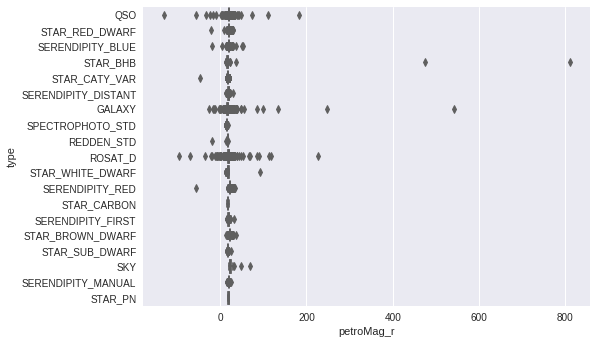

In [30]:
sns.boxplot(y="type", x="petroMag_r", data=train,palette="Set3")
plt.show()

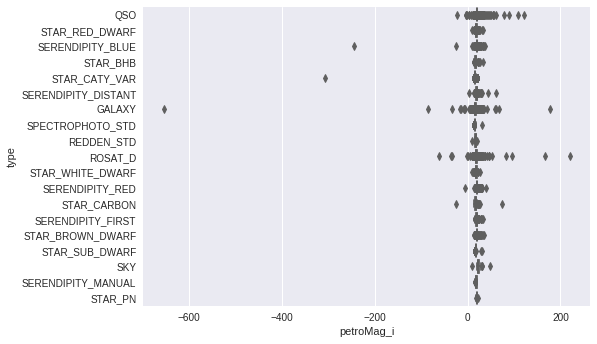

In [31]:
sns.boxplot(y="type", x="petroMag_i", data=train,palette="Set3")
plt.show()

In [32]:
train[train['petroMag_i'] < -600]['petroMag_i']

120745   -654.195115
Name: petroMag_i, dtype: float64

In [0]:
train.drop(train[train['petroMag_i'] < -600]['petroMag_i'].index,axis=0,inplace=True)

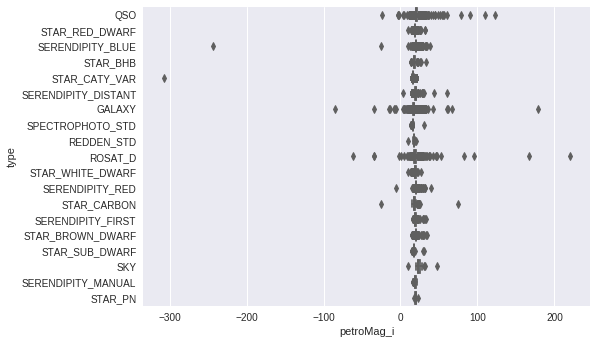

In [34]:
sns.boxplot(y="type", x="petroMag_i", data=train,palette="Set3")
plt.show()

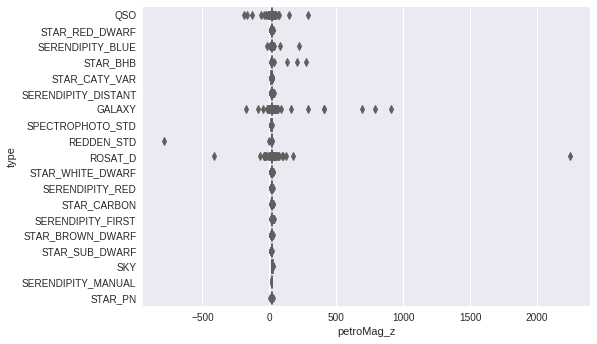

In [35]:
sns.boxplot(y="type", x="petroMag_z", data=train,palette="Set3")
plt.show()

In [36]:
train[train['petroMag_z'] < -500]['petroMag_z']

163952   -789.601838
Name: petroMag_z, dtype: float64

In [0]:
train.drop(train[train['petroMag_z'] < -500]['petroMag_z'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['petroMag_z'] > 2000]['petroMag_z'].index,axis=0,inplace=True)

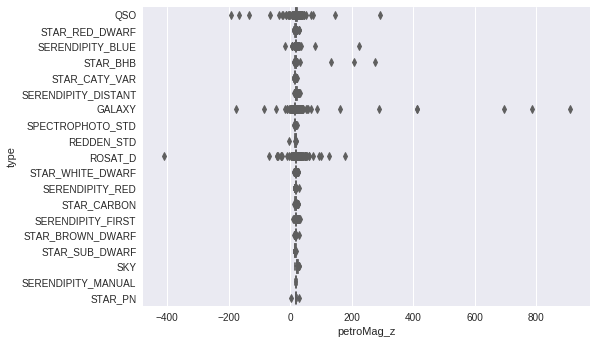

In [39]:
sns.boxplot(y="type", x="petroMag_z", data=train,palette="Set3")
plt.show()

In [40]:
train[['petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z']].describe()

,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
count,199957.000000,199957.000000,199957.000000,199957.000000,199957.000000
mean,20.729893,19.601458,19.017692,18.606941,18.412528
std,5.203952,3.174891,3.056243,2.308408,4.340229
min,-271.434081,-461.827987,-130.554426,-307.627762,-410.624326
25%,19.248183,18.114261,17.480197,17.050917,16.805126
50%,20.366972,19.586785,19.183121,18.693801,18.174819
75%,21.797589,21.004393,20.457521,20.019139,19.807617
max,1452.080803,566.468016,809.628220,219.701423,907.434571


In [41]:
test[['petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z']].describe()

,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,20.715429,19.462021,18.995001,18.616519,18.411996
std,2.807434,13.971203,1.979225,1.970463,2.373022
min,-98.181975,-1348.068776,-23.908952,-8.356654,-64.917293
25%,19.249432,18.104265,17.475078,17.043615,16.805557
50%,20.371014,19.582955,19.197068,18.684269,18.171966
75%,21.803705,21.025719,20.428279,20.015701,19.815916
max,65.392087,106.962571,41.850633,52.221528,74.747394


In [42]:
train[['petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z']].isnull().sum()

petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
dtype: int64

In [0]:
train['petroMag_u']=train['petroMag_u']+272
train['petroMag_g']=train['petroMag_g']+462
train['petroMag_r']=train['petroMag_r']+131
train['petroMag_i']=train['petroMag_i']+308
train['petroMag_z']=train['petroMag_z']+411

In [44]:
train[['petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z']].describe()

,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
count,199957.000000,199957.000000,199957.000000,199957.000000,199957.000000
mean,292.729893,481.601458,150.017692,326.606941,429.412528
std,5.203952,3.174891,3.056243,2.308408,4.340229
min,0.565919,0.172013,0.445574,0.372238,0.375674
25%,291.248183,480.114261,148.480197,325.050917,427.805126
50%,292.366972,481.586785,150.183121,326.693801,429.174819
75%,293.797589,483.004393,151.457521,328.019139,430.807617
max,1724.080803,1028.468016,940.628220,527.701423,1318.434571


In [45]:
test[['petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z']].isnull().sum()

petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
dtype: int64

In [0]:
test['petroMag_u']=test['petroMag_u']+100
test['petroMag_g']=test['petroMag_g']+1350
test['petroMag_r']=test['petroMag_r']+24
test['petroMag_i']=test['petroMag_i']+9
test['petroMag_z']=test['petroMag_z']+65



In [53]:
test[['petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z']].describe()

,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,120.715429,1369.462021,42.995001,27.616519,83.411996
std,2.807434,13.971203,1.979225,1.970463,2.373022
min,1.818025,1.931224,0.091048,0.643346,0.082707
25%,119.249432,1368.104265,41.475078,26.043615,81.805557
50%,120.371014,1369.582955,43.197068,27.684269,83.171966
75%,121.803705,1371.025719,44.428279,29.015701,84.815916
max,165.392087,1456.962571,65.850633,61.221528,139.747394


In [0]:
from scipy.special import boxcox1p
lam = 0.3

for feat in ['petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z']:
  # transform training data & save lambda value
  train[feat] = boxcox1p(train[feat],lam)
  # use lambda value to transform test data
  test[feat] = boxcox1p(test[feat],lam)

In [55]:
train[['petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z']].describe()

,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
count,199957.000000,199957.000000,199957.000000,199957.000000,199957.000000
mean,15.000463,17.945720,11.683340,15.611091,17.227462
std,0.085600,0.057547,0.076495,0.052295,0.062495
min,0.480042,0.162563,0.389648,0.331950,0.334701
25%,14.973123,17.926175,11.637771,15.584194,17.204600
50%,14.994120,17.945674,11.688735,15.612740,17.224259
75%,15.020886,17.964407,11.726612,15.635695,17.247636
max,27.849931,23.375973,22.670812,18.536320,25.440326


In [56]:
train[['petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z']].isnull().sum()

petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
dtype: int64

In [57]:
test[['petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z']].describe()

,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,10.741593,25.768148,7.037070,5.779309,9.277683
std,0.129396,0.245610,0.153105,0.191053,0.134924
min,1.215104,1.269163,0.088288,0.535655,0.080419
25%,10.691692,25.761087,6.930722,5.630591,9.206639
50%,10.730809,25.770510,7.053826,5.790385,9.268362
75%,10.780409,25.779698,7.139800,5.915422,9.341700
max,12.126989,26.315162,8.426750,8.176286,11.369832


In [58]:
test[['petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z']].isnull().sum()

petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
dtype: int64

In [0]:
for data in [train,test]:
  data['petroMag_u*g'] = data['petroMag_u'] * data['petroMag_g']
  data['petroMag_u*r'] = data['petroMag_u'] * data['petroMag_r']
  data['petroMag_u*i'] = data['petroMag_u'] * data['petroMag_i']
  data['petroMag_u*z'] = data['petroMag_u'] * data['petroMag_z']

  data['petroMag_g*r'] = data['petroMag_g'] * data['petroMag_r']
  data['petroMag_g*i'] = data['petroMag_g'] * data['petroMag_i']
  data['petroMag_g*z'] = data['petroMag_g'] * data['petroMag_z']

  data['petroMag_r*i'] = data['petroMag_r'] * data['petroMag_i']
  data['petroMag_r*z'] = data['petroMag_r'] * data['petroMag_z']

  data['petroMag_i*z'] = data['petroMag_i'] * data['petroMag_z']

In [47]:
train.isnull().sum()

id              0
type            0
psfMag_u        0
psfMag_g        0
psfMag_r        0
psfMag_i        0
psfMag_z        0
fiberMag_u      0
fiberMag_g      0
fiberMag_r      0
fiberMag_i      0
fiberMag_z      0
petroMag_u      0
petroMag_g      0
petroMag_r      0
petroMag_i      0
petroMag_z      0
modelMag_u      0
modelMag_g      0
modelMag_r      0
modelMag_i      0
modelMag_z      0
petroMag_u*g    0
petroMag_u*r    0
petroMag_u*i    0
petroMag_u*z    0
petroMag_g*r    0
petroMag_g*i    0
petroMag_g*z    0
petroMag_r*i    0
petroMag_r*z    0
petroMag_i*z    0
dtype: int64

In [48]:
train.head()

,id,type,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u*g,petroMag_u*r,petroMag_u*i,petroMag_u*z,petroMag_g*r,petroMag_g*i,petroMag_g*z,petroMag_r*i,petroMag_r*z,petroMag_i*z
0,0,QSO,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,294.504317,483.431636,152.478312,329.145409,431.422446,22.749241,21.465534,21.364187,21.020605,21.147340,142372.703845,44905.521082,96934.744099,127055.772822,73712.839584,159119.303590,208563.258473,50187.536297,65782.566092,142000.717431
1,1,QSO,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,293.360701,482.778968,151.889705,328.639812,431.646660,21.492955,20.758527,20.753925,20.693389,20.512314,141628.376666,44558.470429,96410.005834,126628.166864,73329.155068,158660.389367,208389.928885,49917.004165,65562.683853,141856.277199
2,2,QSO,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,289.867253,478.738784,147.688874,324.744210,427.808006,17.818063,16.697434,16.641249,16.660177,16.688928,138770.696223,42810.168285,94132.712018,124007.531431,70704.392175,155467.648310,204808.284719,47961.106834,63182.482855,138928.172943
3,3,QSO,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,292.433907,481.993727,150.985531,327.750917,430.455117,20.770711,20.001699,19.889798,19.758113,19.552855,140951.308676,44153.288566,95845.481107,125879.671656,72774.078606,157973.886039,207476.666350,49485.646084,64992.494260,141082.059412
4,4,STAR_RED_DWARF,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,297.859229,484.426929,152.673551,327.610012,429.376141,24.877052,23.147993,21.475342,19.487330,18.375655,144291.031497,45475.226323,97581.665597,127893.646243,73959.179603,158703.111899,208001.365079,50017.384012,65554.380300,140667.922602


In [49]:
test.head()

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u*g,petroMag_u*r,petroMag_u*i,petroMag_u*z,petroMag_g*r,petroMag_g*i,petroMag_g*z,petroMag_r*i,petroMag_r*z,petroMag_i*z
0,199991,251,23.817399,22.508963,20.981106,18.517316,17.076079,25.053890,23.167848,21.335901,18.835858,17.434384,22.246697,22.796239,21.195315,18.584486,17.154284,25.391534,22.499435,21.011918,18.499341,17.091474,507.141019,471.525741,413.443410,381.626149,483.173474,423.656380,391.053162,393.904025,363.590451,318.803541
1,199992,386,22.806983,21.937111,20.335770,20.000512,19.527369,22.498565,22.186000,20.618879,20.301204,20.030078,21.729831,21.837511,20.196128,19.967204,19.683671,22.475338,21.853442,20.173169,19.796757,19.567372,474.525411,438.858453,433.883956,427.722844,441.033171,436.034024,429.842380,403.260210,397.533952,393.027872
2,199993,232,21.024250,19.235669,18.304061,17.808608,17.380113,21.205546,19.439533,18.344433,17.909690,17.538164,20.722629,18.710223,17.611851,17.158519,16.843986,20.579314,18.653338,17.562108,17.120529,16.708748,387.725001,364.963860,355.569627,349.051678,329.521663,321.039718,315.154738,302.193293,296.653786,289.017865
3,199994,557,20.503424,20.286261,20.197204,20.162419,20.059832,20.976132,20.611498,20.567262,20.479318,20.277472,20.329269,20.385262,20.129157,20.206574,20.212342,20.479879,20.280943,20.150499,20.206221,20.092909,414.417476,409.211043,410.784888,410.902151,410.338129,411.916309,412.033895,406.741299,406.857407,408.422200
4,199995,75,24.244851,22.668237,21.239333,19.284777,18.235939,25.681860,22.935289,21.642456,19.624926,18.591749,22.308298,22.957496,21.285033,19.299120,18.307526,25.489360,22.857290,21.191862,19.237964,18.280368,512.142661,474.832850,430.530510,408.409748,488.651058,443.059467,420.294963,410.782396,389.676296,353.319141


In [0]:
train_petroMag= train.drop(train[['fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i', 'fiberMag_z',
                                'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
                                'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']],axis=1)

In [0]:
test_petroMag= test.drop(test[['fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i', 'fiberMag_z',
                                'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
                                'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']],axis=1)

In [61]:
train_petroMag.describe()

,id,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,petroMag_u*g,petroMag_u*r,petroMag_u*i,petroMag_u*z,petroMag_g*r,petroMag_g*i,petroMag_g*z,petroMag_r*i,petroMag_r*z,petroMag_i*z
count,199957.000000,199957.000000,199957.000000,199957.000000,199957.000000,199957.000000,199957.000000,199957.000000,199957.000000,199957.000000,199957.000000,199957.000000,199957.000000,199957.000000,199957.000000,199957.000000
mean,99996.277940,292.729893,481.601458,150.017692,326.606941,429.412528,140982.633984,43917.466589,95609.837018,125703.981346,72252.422237,157297.339331,206807.988614,49000.045393,64423.601785,140252.458208
std,57733.944479,5.203952,3.174891,3.056243,2.308408,4.340229,2855.438270,1358.389220,1939.715301,2719.735297,1721.354317,1821.314152,2698.192295,1187.028882,1866.207518,1977.858820
min,0.000000,0.565919,0.172013,0.445574,0.372238,0.375674,47.890995,83.102067,111.626316,121.454662,25.248197,55.306822,81.455138,31.722442,57.891596,126.377755
25%,49998.000000,291.248183,480.114261,148.480197,325.050917,427.805126,139861.848395,43283.585038,94775.049533,124739.307776,71297.104836,156114.321462,205465.377568,48268.151690,63525.409157,139064.215393
50%,99996.000000,292.366972,481.586785,150.183121,326.693801,429.174819,140832.353981,43927.402237,95606.489009,125672.651253,72351.603536,157480.290219,206995.818477,49084.566359,64523.095906,140231.293166
75%,149997.000000,293.797589,483.004393,151.457521,328.019139,430.807617,141941.360014,44509.720163,96361.663400,126521.271911,73141.460175,158420.284123,208016.961915,49685.610891,65246.426663,141318.919340
max,199990.000000,1724.080803,1028.468016,940.628220,527.701423,1318.434571,835053.981720,372523.288933,559110.969656,770665.824641,440720.592298,355801.368066,631230.331063,303753.629415,582659.765453,428128.180432


In [0]:
train_petroMag.to_csv('/content/drive/My Drive/Colab Notebooks/train_petroMag.csv')
test_petroMag.to_csv('/content/drive/My Drive/Colab Notebooks/test_petroMag.csv')

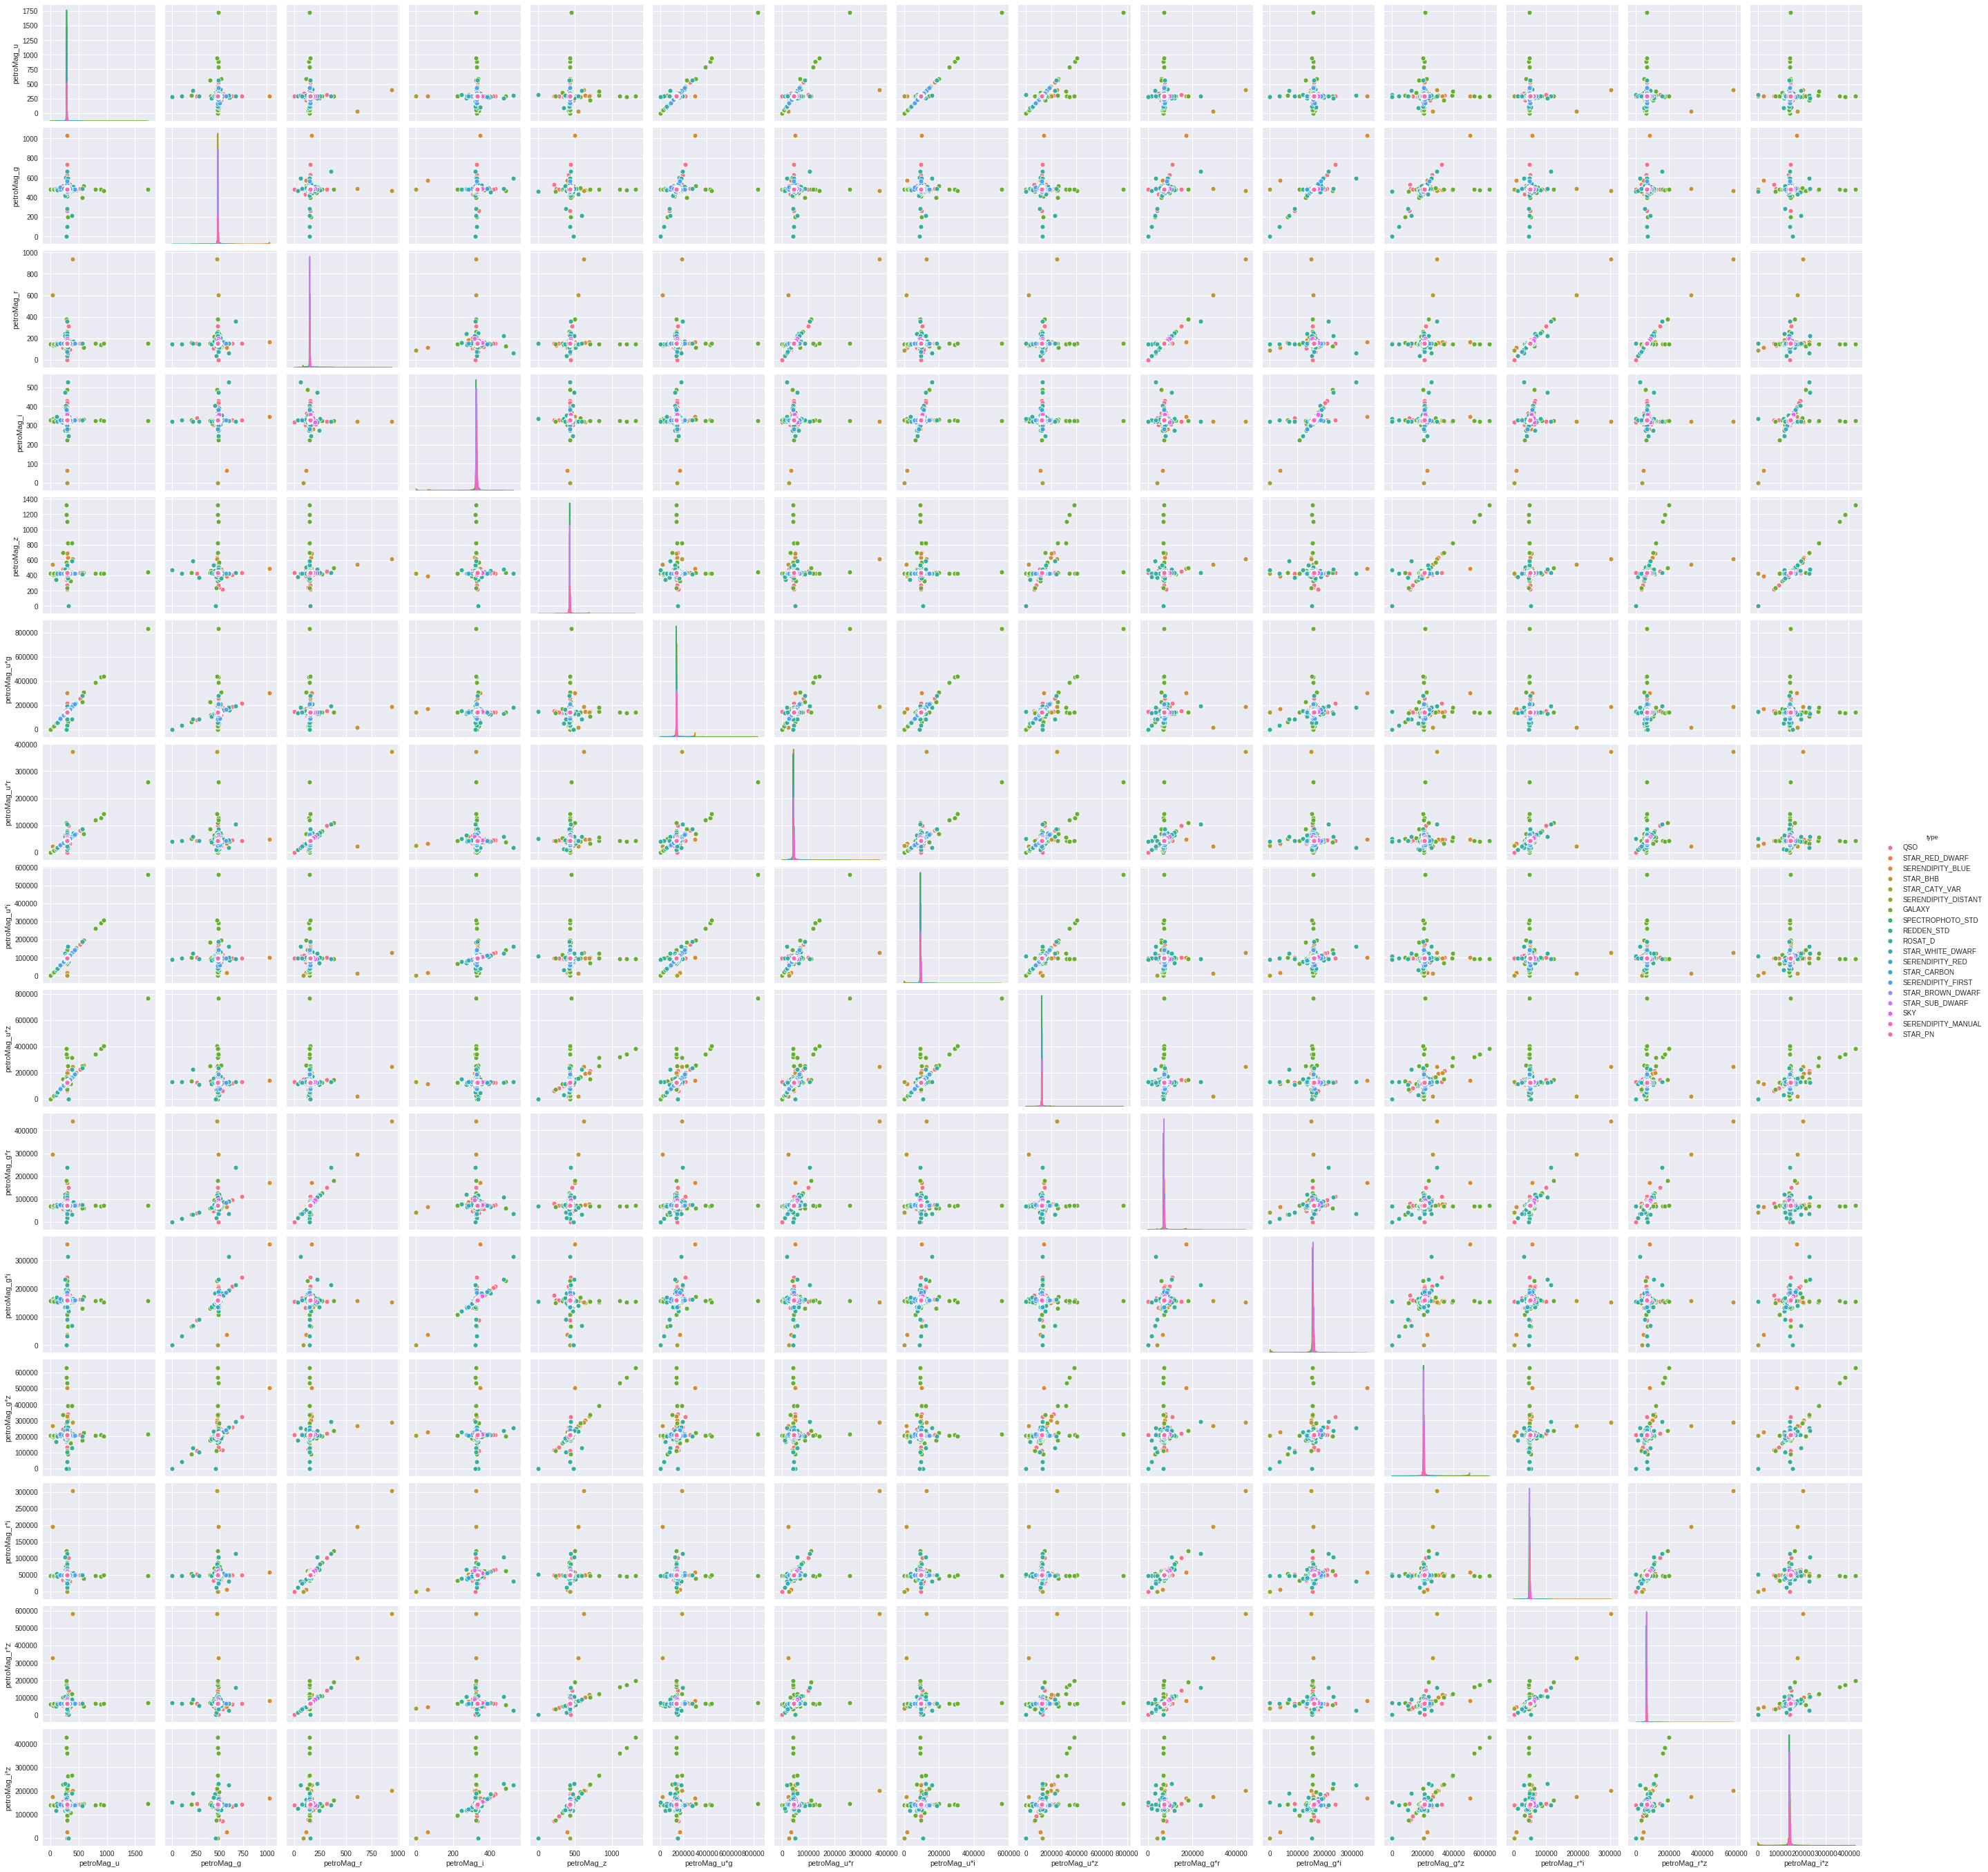

In [62]:
sns.pairplot(train_petroMag.drop(columns=['id']),hue='type')

In [63]:
train_petroMag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199957 entries, 0 to 199990
Data columns (total 17 columns):
id              199957 non-null int64
type            199957 non-null object
petroMag_u      199957 non-null float64
petroMag_g      199957 non-null float64
petroMag_r      199957 non-null float64
petroMag_i      199957 non-null float64
petroMag_z      199957 non-null float64
petroMag_u*g    199957 non-null float64
petroMag_u*r    199957 non-null float64
petroMag_u*i    199957 non-null float64
petroMag_u*z    199957 non-null float64
petroMag_g*r    199957 non-null float64
petroMag_g*i    199957 non-null float64
petroMag_g*z    199957 non-null float64
petroMag_r*i    199957 non-null float64
petroMag_r*z    199957 non-null float64
petroMag_i*z    199957 non-null float64
dtypes: float64(15), int64(1), object(1)
memory usage: 32.5+ MB


In [64]:
train_petroMag.isnull().sum()

id              0
type            0
petroMag_u      0
petroMag_g      0
petroMag_r      0
petroMag_i      0
petroMag_z      0
petroMag_u*g    0
petroMag_u*r    0
petroMag_u*i    0
petroMag_u*z    0
petroMag_g*r    0
petroMag_g*i    0
petroMag_g*z    0
petroMag_r*i    0
petroMag_r*z    0
petroMag_i*z    0
dtype: int64

In [65]:
train.isnull().sum()

id              0
type            0
psfMag_u        0
psfMag_g        0
psfMag_r        0
psfMag_i        0
psfMag_z        0
fiberMag_u      0
fiberMag_g      0
fiberMag_r      0
fiberMag_i      0
fiberMag_z      0
petroMag_u      0
petroMag_g      0
petroMag_r      0
petroMag_i      0
petroMag_z      0
modelMag_u      0
modelMag_g      0
modelMag_r      0
modelMag_i      0
modelMag_z      0
petroMag_u*g    0
petroMag_u*r    0
petroMag_u*i    0
petroMag_u*z    0
petroMag_g*r    0
petroMag_g*i    0
petroMag_g*z    0
petroMag_r*i    0
petroMag_r*z    0
petroMag_i*z    0
dtype: int64